# 基于K-means的用户分层


In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## 数据

数据里包含了产品的信息，以及用户购买产品的记录。 

In [2]:
data_offer = pd.read_excel("./WineKMC.xlsx", sheetname=0)
data_offer.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
data_offer.head()

D:\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [3]:
data_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
data_transactions.columns = ["customer_name", "offer_id"]
data_transactions['n'] = 1
data_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [4]:
import numpy as np

# 合并两个dataframe
cust_compare = data_transactions.merge(data_offer, on = 'offer_id')

#Drop unnecessary columns
cust_compare = cust_compare.drop(['campaign', 'varietal', 'min_qty', 'discount', 'origin', 'past_peak'], axis = 1)

#Create pivot table
table = pd.pivot_table(cust_compare,  index = 'customer_name', columns = 'offer_id', aggfunc=np.sum, fill_value = 0)
table


n                            ...                              
offer_id      1  2  3  4  5  6  7  8  9  10 ... 23 24 25 26 27 28 29 30 31 32
customer_name                               ...                              
Adams          0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  1  1  0  0
Allen          0  0  0  0  0  0  0  0  1  0 ...  0  0  0  0  1  0  0  0  0  0
Anderson       0  0  0  0  0  0  0  0  0  0 ...  0  1  0  1  0  0  0  0  0  0
Bailey         0  0  0  0  0  0  1  0  0  0 ...  0  0  0  0  0  0  0  1  0  0
Baker          0  0  0  0  0  0  1  0  0  1 ...  0  0  0  0  0  0  0  0  1  0
Barnes         0  0  0  0  0  0  0  0  0  1 ...  0  0  0  0  0  0  0  0  1  0
Bell           0  1  0  0  0  0  0  0  0  0 ...  0  1  0  1  0  0  0  0  0  0
Bennett        0  0  0  0  0  0  0  1  0  0 ...  0  0  0  0  0  0  1  0  0  0
Brooks         0  0  1  0  0  0  0  1  0  0 ...  0  0  0  0  0  0  0  0  0  0
Brown          0  0  0  0  0  0  1  0  0  0 ...  0  0  0  0  0  0  1  1  0  0
Butler         1  0  0  1  0  0  0  0  0  0 ...  0  0  0  0  0  1  0  1  0  0
Campbell       0  1  0  0  0  0  0  0  0  0 ...  0  1  0  1  0  0  0  0  0  0
Carter         0  0  0  0  0  0  1  0  0  0 ...  0  0  0  0  0  0  1  1  0  0
Clark          0  0  0  1  0  0  0  0  0  0 ...  0  0  0  0  0  1  0  0  1  0
Collins        0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  1  0  0
Cook           0  0  0  0  0  0  0  0  0  0 ...  0  1  0  1  0  0  0  0  0  0
Cooper         0  0  0  1  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  1
Cox            0  1  0  0  0  0  0  0  0  0 ...  0  1  0  1  0  0  0  0  0  0
Cruz           0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  1  1  0  0
Davis          0  0  0  0  0  0  0  0  0  0 ...  0  0  1  0  0  0  0  0  0  0
Diaz           0  0  0  0  0  0  1  1  0  0 ...  0  0  0  0  0  0  1  1  0  0
Edwards        0  0  0  0  0  0  0  1  0  0 ...  0  0  0  0  1  0  0  0  0  0
Evans          0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  1  0  0  0  0  0
Fisher         1  1  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  1  0  1  1  0
Flores         0  0  0  0  0  0  0  0  0  0 ...  0  1  0  0  0  0  0  0  0  0
Foster         1  0  0  0  0  0  0  0  1  0 ...  1  0  0  0  0  0  0  0  0  0
Garcia         0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
Gomez          0  0  0  0  0  0  0  0  0  0 ...  0  0  1  0  0  0  0  0  0  1
Gonzalez       0  0  0  0  0  0  0  0  1  0 ...  0  0  0  0  0  0  0  0  1  0
Gray           0  0  0  0  0  0  0  0  0  0 ...  0  0  0  1  0  0  0  0  0  0
...           .. .. .. .. .. .. .. .. .. .. ... .. .. .. .. .. .. .. .. .. ..
Reed           0  0  0  0  1  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
Reyes          0  0  0  0  0  0  0  0  1  0 ...  1  0  0  0  0  0  0  0  0  0
Richardson     0  0  1  0  0  1  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
Rivera         0  0  0  0  0  0  1  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
Roberts        0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  1  0
Robinson       0  0  0  0  0  0  1  0  0  0 ...  0  0  0  0  0  0  1  0  0  0
Rodriguez      0  1  0  0  0  0  0  0  0  0 ...  0  0  0  1  0  0  0  0  0  0
Rogers         0  0  1  0  0  0  1  1  0  0 ...  0  0  0  0  0  0  0  0  0  0
Ross           0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
Russell        0  0  0  0  0  0  0  0  0  0 ...  0  0  0  1  0  0  0  0  0  0
Sanchez        0  0  0  1  1  0  0  0  0  0 ...  0  0  0  1  0  0  0  0  0  0
Sanders        1  0  0  1  1  1  0  0  1  0 ...  0  0  1  1  0  0  0  0  0  0
Scott          0  0  0  0  0  1  0  0  0  0 ...  1  0  0  0  0  0  0  0  0  0
Smith          0  1  0  0  0  0  0  0  0  0 ...  0  1  0  0  0  0  0  0  0  0
Stewart        0  0  0  0  0  0  0  1  0  0 ...  0  0  0  0  0  0  1  1  0  0
Sullivan       0  0  0  0  0  0  0  1  0  0 ...  0  0  0  0  0  0  0  0  0  0
Taylor         0  0  0  0  0  0  1  0  0  0 ...  0  0  0  0  0  0  1  1  0  0
Thomas         1  0  0  1  0  0  0  0

### 选择 K: The Elbow Sum-of-Squares Method



$$SS = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$



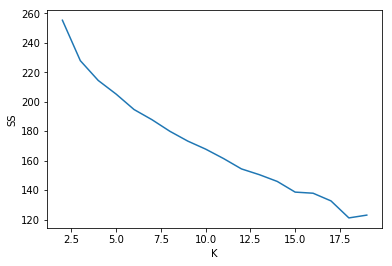

In [5]:
#offers = table.columns.get_level_values('offer_id')
#x_cols = np.matrix(offers)
SS = []
from sklearn.cluster import KMeans
for K in range(2, 20):
    kmeans = KMeans(n_clusters = K).fit(table) #Using all default values from method
    SS.append(kmeans.inertia_)
    
plt.plot(range(2,20), SS);
plt.xlabel('K');
plt.ylabel('SS');

Text(0, 0.5, '# of samples')

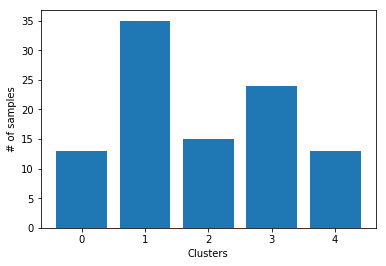

In [6]:
#Choosing K=5
kmeans_5 = KMeans(n_clusters = 5).fit_predict(table)
points = list(kmeans_5)
d = {x:points.count(x) for x in points}
heights = list(d.values())
plt.bar(range(5),heights)
plt.xlabel('Clusters')
plt.ylabel('# of samples')


## 利用降维的方法来可视化样本


(100, 32)
(100, 2)


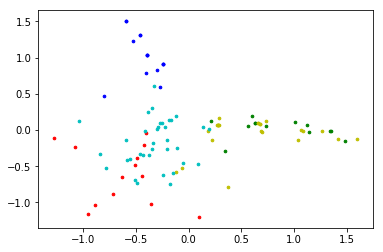

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_new = pca.fit_transform(table)

print(table.shape)
print(data_new.shape)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

for i in range(5):
        points = np.array([data_new[j] for j in range(len(data_new)) if kmeans_5[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
